In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
a = [1, 2, 3]
b = np.ones((3, 3))
print(a)
print(b)

[1, 2, 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [3]:
print(a @ b)
print(np.einsum('i,ij->j', a, b))

[6. 6. 6.]
[6. 6. 6.]


1000
-4.539889921550966e-06


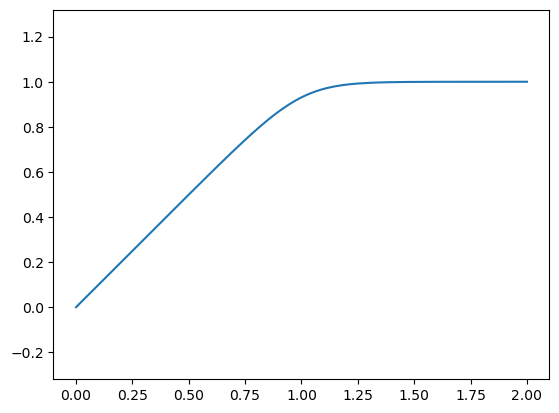

In [4]:
x = np.linspace(0, 2, 1000)
print(len(x))
f = lambda x: (1 - np.log(1 + np.exp(10 - 10 * x)) / 10)
print(f(0))
plt.plot(x, f(x))
plt.axis('equal')
plt.show()

In [9]:
resolution = [0.05, 0.049, 0.049]
Ce = [[0.02454721, 0.02416097, 0.0644928],
      [0.02416097, 0.25310026, 0.00743102],
      [0.0644928, 0.00743102, 0.20989219]]
U = np.linalg.svd(Ce)[0]
U3 = U[:, 2]
z = U3[0] * resolution[0]
x = U3[1] * resolution[1]
y = U3[2] * resolution[2]
phi = math.atan2(y, x) * 180 / np.pi
theta = math.atan2(math.sqrt(x ** 2 + y ** 2), z) * 180 / np.pi
print(phi, theta)
Ce = [[0.02357253, 0.02227284, 0.06436205],
      [0.02227284, 0.20017209, 0.0174685],
      [0.06436205, 0.0174685, 0.21842065]]
U = np.linalg.svd(Ce)[0]
U3 = U[:, 2]
z = U3[0] * resolution[0]
x = U3[1] * resolution[1]
y = U3[2] * resolution[2]
phi = math.atan2(y, x)
theta = math.atan2(math.sqrt(x ** 2 + y ** 2), z)

print(math.acos(x / np.sqrt(x ** 2 + y ** 2)) * 180 / np.pi)

print(phi, theta)


74.17165067924576 162.5838231843407
73.37033961048016
1.2805539995092927 2.851809524137598


In [139]:
def genD(ang, var):
    Rx = np.array([[1, 0, 0], [0, np.cos(ang[0]), -np.sin(ang[0])], [0, np.sin(ang[0]), np.cos(ang[0])]])
    Ry = np.array([[np.cos(ang[1]), 0, np.sin(ang[1])],
                   [0, 1, 0],
                   [-np.sin(ang[1]), 0, np.cos(ang[1])]])
    Rz = np.array([[np.cos(ang[2]), -np.sin(ang[2]), 0],
                   [np.sin(ang[2]), np.cos(ang[2]), 0],
                   [0, 0, 1]])

    R_tot = Rx @ Ry @ Rz
    # R = np.eye(3)
    print("R", np.round(R_tot, 3))
    print(var)
    print("sigma", np.round(R_tot @ np.diag(var) @ np.linalg.inv(R_tot), 3))
    # print(np.linalg.inv(R @ np.diag(var.T) @ R.T))
    return np.linalg.inv(R_tot @ np.diag(var) @ np.linalg.inv(R_tot))

In [188]:

FWMH = np.array((5, 1, 1))
C = np.divide(FWMH / (2 * np.sqrt(2 * np.log(2))), resolution)
print(C)
C = (4, 1, 2)
angle = np.array([10, 0, 0]) / 180 * np.pi
Dtrue = genD(angle, C)
print("Dtrue", np.round(Dtrue, 3))

# U = np.linalg.svd(np.linalg.inv(Dtrue))[0]
# print(U)
# z = U3[0] * resolution[0]
# x = U3[1] * resolution[1]
# y = U3[2] * resolution[2]
# phi = math.atan2(y, x)
# theta = math.atan2(math.sqrt(x**2+y**2), z)
#
# print(math.acos(x/np.sqrt(x**2+y**2))*180/np.pi)

print(phi * 180 / np.pi, theta * 180 / np.pi)

sigma = np.linalg.inv(Dtrue)
print("sigma", np.round(sigma, 3))
U = np.linalg.svd(sigma)[0]
print(np.round(U, 3))

R = U
thet_x = -math.atan2(R[1, 2], R[2, 2])
thet_y = math.atan2(R[0, 2], np.sqrt(R[1, 2] ** 2 + R[2, 2] ** 2))
thet_z = -math.atan2(R[0, 1], R[0, 0])
print(np.array([thet_x, thet_y, thet_z]) * 180 / np.pi)

# R = U
# thet_x = math.atan2(R[2, 1], R[2, 2])
# thet_y = math.atan2(R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
# thet_z = math.atan2(R[1, 0], R[0, 0])
# print(math.acos(x/np.sqrt(x**2+y**2))*180/np.pi)
# #
# # print(thet_x*180/np.pi, thet_y*180/np.pi, thet_z*180/np.pi)
#
# from scipy.spatial.transform import Rotation as R
#
# r = R.from_euler(sigma)
# print(r.as_euler('zxy', degrees=True))

[42.46609001  8.66654898  8.66654898]
R [[ 1.     0.     0.   ]
 [ 0.     0.985 -0.174]
 [ 0.     0.174  0.985]]
(4, 1, 2)
sigma [[ 4.     0.     0.   ]
 [ 0.     1.03  -0.171]
 [ 0.    -0.171  1.97 ]]
Dtrue [[0.25  0.    0.   ]
 [0.    0.985 0.086]
 [0.    0.086 0.515]]
-180.0 90.0
sigma [[ 4.     0.     0.   ]
 [ 0.     1.03  -0.171]
 [ 0.    -0.171  1.97 ]]
[[ 1.     0.     0.   ]
 [ 0.    -0.174  0.985]
 [ 0.     0.985  0.174]]
[-80.   0.  -0.]


In [224]:
A = np.diag((4, 1, 1))
print(A)

ang = np.array([40, 30, 20]) / 180 * np.pi

Rx = np.array([[1, 0, 0], [0, np.cos(ang[0]), -np.sin(ang[0])], [0, np.sin(ang[0]), np.cos(ang[0])]])
Ry = np.array([[np.cos(ang[1]), 0, np.sin(ang[1])],
               [0, 1, 0],
               [-np.sin(ang[1]), 0, np.cos(ang[1])]])
Rz = np.array([[np.cos(ang[2]), -np.sin(ang[2]), 0],
               [np.sin(ang[2]), np.cos(ang[2]), 0],
               [0, 0, 1]])

R = Rx @ Ry @ Rz

print("R \n", R)

sigma = R @ A @ R.T

print(np.linalg.svd(sigma)[0][:, 2])
U3 = np.linalg.svd(sigma)[0][:, 2]
z = U3[0]
x = U3[1]
y = U3[2]
phi = math.atan2(y, x) / np.pi * 180
if phi < 0:
    phi += 180
thet = 90 - math.atan2(np.sqrt(x ** 2 + y ** 2), z) / np.pi * 180
print("angles SVD : ", phi, thet)

from scipy.spatial.transform import Rotation

r = Rotation.from_matrix(np.linalg.svd(sigma)[0])
print(r.as_euler('xyz', degrees=True))

# print(np.linalg.eigh(sigma)[0])
# U = np.linalg.eigh(sigma)[1]
# print("U \n", U)
#
# R = U
# thet_x = -math.atan2(R[1, 2], R[2, 2])
# thet_y = math.atan2(R[0, 2], np.sqrt(R[1, 2]**2 + R[2, 2]**2))
# thet_z = -math.atan2(R[0, 1], R[0, 0])
# print(np.array([thet_x, thet_y, thet_z])*180/np.pi)
#
# V = np.linalg.svd(sigma)[2]
# print("V \n", V)
#
# R = V
# thet_x = -math.atan2(R[1, 2], R[2, 2])
# thet_y = math.atan2(R[0, 2], np.sqrt(R[1, 2]**2 + R[2, 2]**2))
# thet_z = -math.atan2(R[0, 1], R[0, 0])
# print(np.array([thet_x, thet_y, thet_z])*180/np.pi)


# sigma = R@A@R.T
# D = np.linalg.inv(sigma)
# print(D)
# print(np.linalg.svd(D))
# U = np.linalg.svd(D)[0]
# print("U", U)
# U_inv = np.linalg.inv(U)
# print("U inv", U@U_inv)
# print(math.atan2(U[0, 1], U[0, 0]))
#
# from scipy.spatial.transform import Rotation
#
# print(U_inv)
# r = Rotation.from_matrix(R)
# print(r.as_euler('xyz', degrees=True))
# print(r.as_rotvec()/np.pi*180)
# print(r.as_mrp())
# print(r.as_quat())

[[4 0 0]
 [0 1 0]
 [0 0 1]]
R 
 [[ 0.81379768 -0.29619813  0.5       ]
 [ 0.56401402  0.60992316 -0.5566704 ]
 [-0.14007684  0.73502409  0.66341395]]
[ 0.58114829 -0.7898041   0.1961534 ]
angles SVD :  166.0523887323879 35.53134776280418
[ 177.18673057   27.4430844  -146.92632841]


In [88]:
import math
import numpy as np


# RPY/Euler angles to Rotation Vector
def euler_to_rotVec(yaw, pitch, roll):
    # compute the rotation matrix
    Rmat = euler_to_rotMat(yaw, pitch, roll)

    theta = math.acos(((Rmat[0, 0] + Rmat[1, 1] + Rmat[2, 2]) - 1) / 2)
    sin_theta = math.sin(theta)
    if sin_theta == 0:
        rx, ry, rz = 0.0, 0.0, 0.0
    else:
        multi = 1 / (2 * math.sin(theta))
        rx = multi * (Rmat[2, 1] - Rmat[1, 2]) * theta
        ry = multi * (Rmat[0, 2] - Rmat[2, 0]) * theta
        rz = multi * (Rmat[1, 0] - Rmat[0, 1]) * theta
    return rx, ry, rz


def euler_to_rotMat(yaw, pitch, roll):
    Rz_yaw = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]])
    Ry_pitch = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]])
    Rx_roll = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]])
    # R = RzRyRx
    rotMat = np.dot(Rz_yaw, np.dot(Ry_pitch, Rx_roll))
    return rotMat


roll = 2.6335
pitch = 0.4506
yaw = 1.1684

print("roll = ", roll)
print("pitch = ", pitch)
print("yaw = ", yaw)
print("")

rx, ry, rz = euler_to_rotVec(yaw, pitch, roll)

print(rx, ry, rz)

roll =  2.6335
pitch =  0.4506
yaw =  1.1684

1.9835417444319592 1.4880895033958756 -0.11874453805958061


gv.plot  False


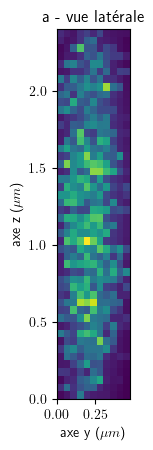

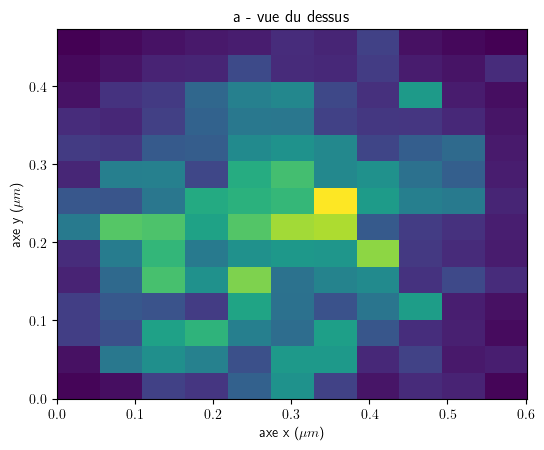

In [8]:
from skimage import io as skio

a = skio.imread("/home/julin/Téléchargements/Estimation PSF billes 0.2um/mycrops10_.tif")
import observation3D

observation3D.observ(a, 0, "a")

In [72]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import math

i = 1
data = loadmat('/home/julin/Téléchargements/Estimation PSF billes 0 (1).2um/mycrops' + str(i) + '_FIGARO.mat')
print(data.keys())
print(data["Ce"])

dict_keys(['__header__', '__version__', '__globals__', 'Ae', 'Be', 'Ce', 'Ge', 'Mue', 'Pe', 'Phi', 'Radius', 'Theta', 'Y', 'Ymax', 'd', 'filebead', 'lambda', 'x1', 'x2', 'x3'])
[[26.34487771 -1.09075012  0.79173107]
 [-1.09075012 27.02674922  0.76908831]
 [ 0.79173107  0.76908831  0.32792449]]


(16,)


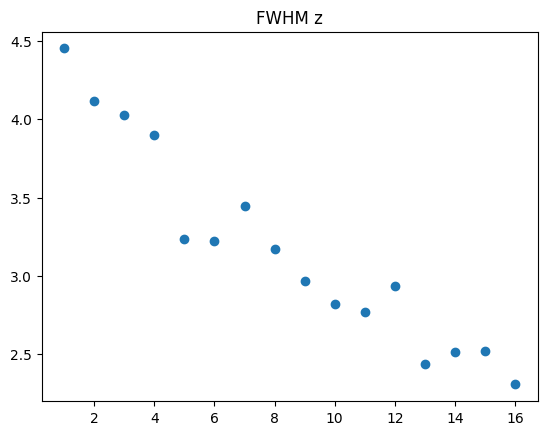

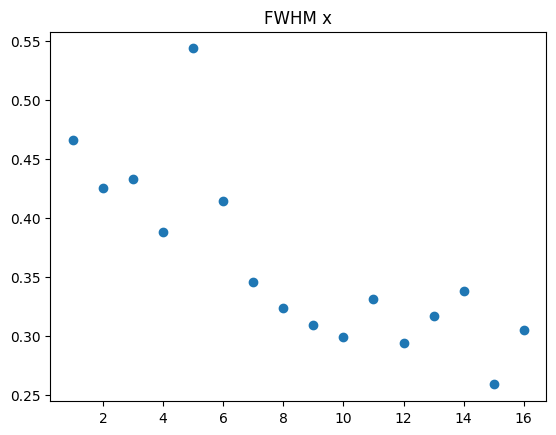

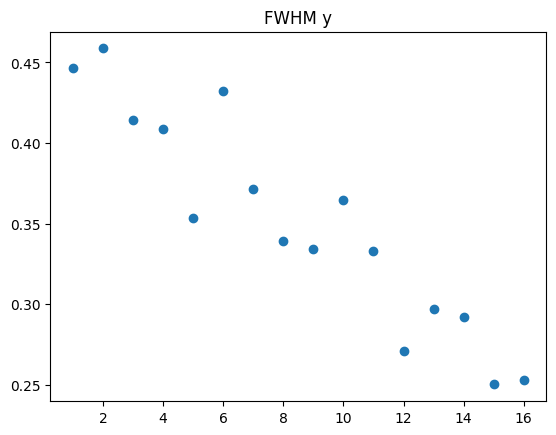

In [44]:
i_list = np.arange(1, 17)
FWHM_list = np.zeros((16, 3))
for i in range(1, 17):
    data = loadmat('/home/julin/Téléchargements/Estimation PSF billes 0 (1).2um/mycrops' + str(i) + '_FIGARO.mat')
    # print(data["Ce"])
    sigma = np.linalg.inv(data["Ce"])
    FWHM = np.sqrt(np.linalg.eig(sigma)[0]) * (2 * np.sqrt(2 * np.log(2)))
    # print(FWHM)
    FWHM_list[i - 1] = FWHM

plt.plot(i_list, FWHM_list[:, 0], "o")
plt.title("FWHM z")
plt.show()
plt.plot(i_list, FWHM_list[:, 1], "o")
plt.title("FWHM x")
plt.show()
plt.plot(i_list, FWHM_list[:, 2], "o")
plt.title("FWHM y")
plt.show()

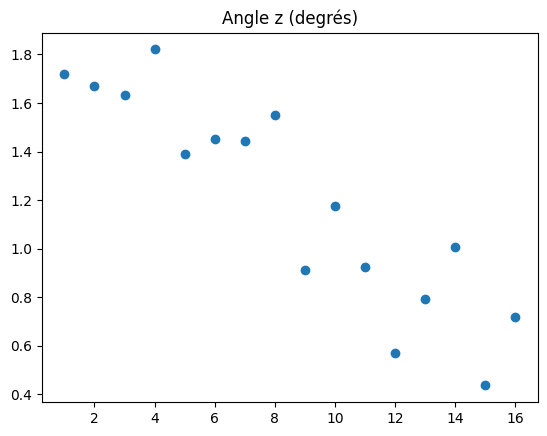

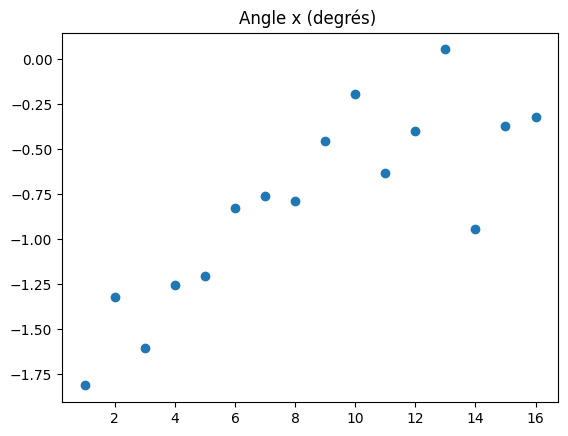

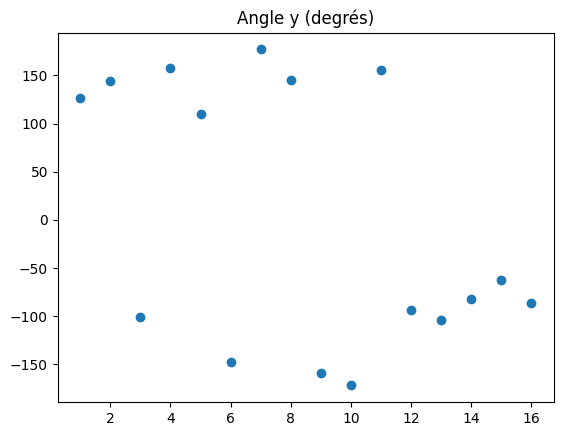

In [70]:
thet_list = np.zeros((16, 3))
for i in range(1, 17):
    data = loadmat('/home/julin/Téléchargements/Estimation PSF billes 0 (1).2um/mycrops' + str(i) + '_FIGARO.mat')
    # print(data["Ce"])
    Ce = np.linalg.inv(data["Ce"])
    sigma = np.linalg.inv(Ce)
    # print("sigma", np.round(sigma, 3))
    U = np.linalg.svd(sigma)[0]
    # print(np.round(U, 3))

    R = U
    thet_x = -math.atan2(R[1, 2], R[2, 2])
    thet_y = math.atan2(R[0, 2], np.sqrt(R[1, 2] ** 2 + R[2, 2] ** 2))
    thet_z = -math.atan2(R[0, 1], R[0, 0])
    thet = np.array([thet_x, thet_y, thet_z])
    thet_list[i - 1] = thet * 180 / np.pi

plt.plot(i_list, thet_list[:, 0], "o")
plt.title("Angle z (degrés)")
plt.show()
plt.plot(i_list, thet_list[:, 1], "o")
plt.title("Angle x (degrés) ")
plt.show()
plt.plot(i_list, thet_list[:, 2], "o")
plt.title("Angle y (degrés)")
plt.show()

In [52]:
Ce = [[8.70605357e-03, 2.22859760e-05, 2.88763847e-02],
      [2.22859760e-05, 2.26767846e-01, 5.29191415e-07],
      [2.88763847e-02, 5.29191415e-07, 2.31665240e-01]]

sigma = np.linalg.inv(Ce)
# print("sigma", np.round(sigma, 3))
U = np.linalg.svd(sigma)[0]
# print(np.round(U, 3))

R = U
thet_x = -math.atan2(R[1, 2], R[2, 2])
thet_y = math.atan2(R[0, 2], np.sqrt(R[1, 2] ** 2 + R[2, 2] ** 2))
thet_z = -math.atan2(R[0, 1], R[0, 0])
thet = np.array([thet_x, thet_y, thet_z])
print("Angle x, y, z", thet * 180 / np.pi)

Angle x, y, z [ 179.97749553   -7.26103266 -179.99714932]


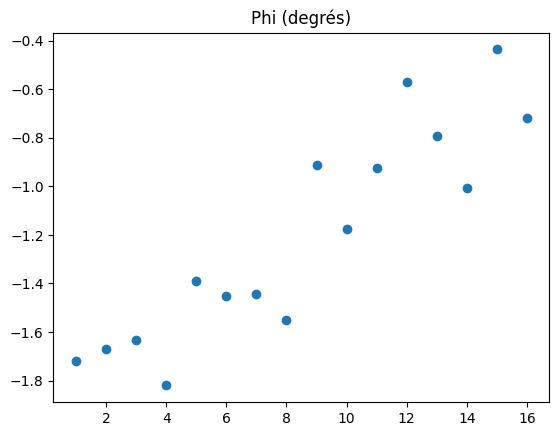

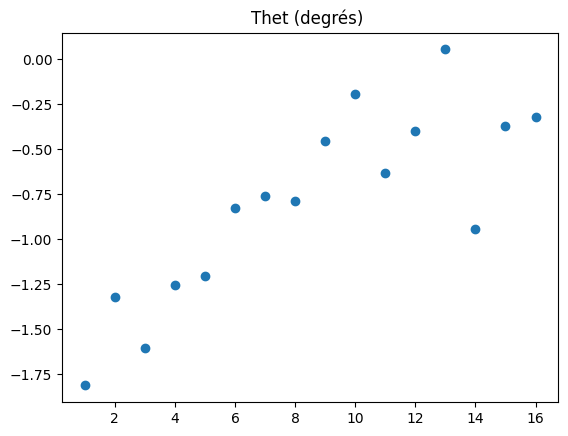

In [62]:
plt.show()
thet_list = np.zeros((16, 2))
for i in range(1, 17):
    data = loadmat('/home/julin/Téléchargements/Estimation PSF billes 0 (1).2um/mycrops' + str(i) + '_FIGARO.mat')
    # print(data["Ce"])
    Ce = np.linalg.inv(data["Ce"])
    sigma = np.linalg.inv(Ce)
    U3 = np.linalg.eigh(sigma)[0][:, 2]
    z = U3[0]
    x = U3[1]
    y = U3[2]
    phi = math.atan2(x, y) / np.pi * 180
    # if phi < 0:
    #     phi += 180
    thet = 90 - math.atan2(np.sqrt(x ** 2 + y ** 2), z) / np.pi * 180
    thet_list[i - 1] = [phi, thet]

plt.plot(i_list, thet_list[:, 0], "o")
plt.title("Phi (degrés)")
plt.show()
plt.plot(i_list, thet_list[:, 1], "o")
plt.title("Thet (degrés) ")
plt.show()
# plt.plot(i_list, thet_list[:, 2], "o")
# plt.title("FWHM y (degrés)")
# plt.show()



In [71]:
Ce = [[7.74125730e-03, 2.21692404e-05, 2.06008188e-02],
      [2.21692404e-05, 1.36940550e-01, 6.16660895e-06],
      [2.06008188e-02, 6.16660895e-06, 1.57017730e-01]]

sigma = np.linalg.inv(Ce)
U3 = np.linalg.eigh(sigma)[0][:, 2]
z = U3[0]
x = U3[1]
y = U3[2]
phi = math.atan2(x, y) / np.pi * 180
if phi < 0:
    phi = phi+180
thet = 90 - math.atan2(np.sqrt(x ** 2 + y ** 2), z) / np.pi * 180
print("Phi, Thet = ", [phi, thet])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed